23.88802613420657
21.281528821697677
36.053895359272325
24.343103883760772
17.616291911359294
31.154452943037377
21.481657691593295
27.39242638006226
27.780995558374197
23.000826911078235
15.078047034265596
29.24798621470822
32.61929586212919
22.324347930019094
25.924772469753947
22.76486341633875
23.607149934716368
24.25389512215586
28.32627335657654
22.523035551662737
22.629193948535175
23.703679511325355
23.307245799971266
19.009728194375228
20.942118787083388
23.342138131965147
26.698417580281415
20.444071182367562
22.5058404152886
21.314143702936548
31.04671156518892
19.207806390089928
24.674608581586817
25.542211791796646
17.0100218888431
24.013253363798754
16.83593087404207
22.50626722345282
25.239576057181647
25.60307912949521
25.39620442857953
35.9387888624333
39.60134002342387
24.596591031245158
26.484817183290534
23.887773314661455
18.805590466707827
12.690966974794874
28.56180047112002
28.893573408496426
18.73695879416839
22.075956390397394
26.807426392844896
23.19394523422

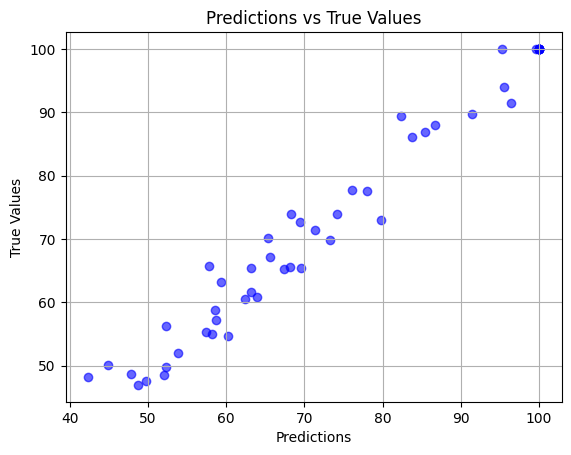

['lm.pkl']

In [63]:
import numpy as np
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
db=pd.read_csv('studentPerformance (1).csv')
x=db[['Study_Hours', 'Attendance', 'Practice_Tests']]
y=db['Final_Score']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
pred = [min(y, 100) for y in pred]
from sklearn.metrics import mean_squared_error
first_error = mean_squared_error(y_test , pred)
while mean_squared_error(y_test , pred)>first_error*0.5 :
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,shuffle=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    pred = [min(y, 100) for y in pred]
    print(mean_squared_error(y_test , pred))
import matplotlib.pyplot as plt

plt.scatter(pred, y_test, color='blue', alpha=0.6)  # scatter plot
plt.xlabel('Predictions')  # x-axis label
plt.ylabel('True Values')  # y-axis label
plt.title('Predictions vs True Values')
plt.grid(True)
plt.show()

joblib.dump(lm,"lm.pkl")


